## Introduction

This investigation is to look at historic maximum temperatures in Cheltenham, VIC to see if there is any evidence for climate change.


## Source

Data is sourced from the [BOM](http://www.bom.gov.au/vic/forecasts/melbourne.shtml) for Cheltenham, Victoria.

Direct link to archive of BOM dataset is [here](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=086077&p_c=-1481991648&p_nccObsCode=122&p_startYear=1971).

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load CSV Data

In [82]:
data = pd.read_csv('data/IDCJAC0010_086077_1800_Data.csv', 
            usecols=['Year', 'Month', 'Day', 'Maximum temperature (Degree C)'])
data[data.Year == 1980].head()

,Year,Month,Day,Maximum temperature (Degree C)
3287,1980,1,1,19.6
3288,1980,1,2,31.4
3289,1980,1,3,33.6
3290,1980,1,4,20.4
3291,1980,1,5,19.3


Extract the year, month and temperature.

In [83]:
# prepare our working dataframe with a subset of these columns
df0 = data[['Year', 'Month', 'Maximum temperature (Degree C)']]
df0.columns = ['year', 'month', 'maximum']
df0, df0.dtypes, df0.columns

(       year  month  maximum
 0      1971      1      NaN
 1      1971      1      NaN
 2      1971      1      NaN
 3      1971      1      NaN
 4      1971      1      NaN
 ...     ...    ...      ...
 18543  2021     10     21.2
 18544  2021     10     25.0
 18545  2021     10     15.4
 18546  2021     10     14.5
 18547  2021     10     19.5
 
 [18548 rows x 3 columns],
 year         int64
 month        int64
 maximum    float64
 dtype: object,
 Index(['year', 'month', 'maximum'], dtype='object'))

Treat `year` and `month` as categorical data:

In [84]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     18548 non-null  int64  
 1   month    18548 non-null  int64  
 2   maximum  18099 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 434.8 KB


What percentage of the records have missing data?

In [85]:
df0['maximum'].isna().sum() / df0['maximum'].sum()

0.001250980375767758

So less than 0.12%.

Box plot of maximum temperatures by month:

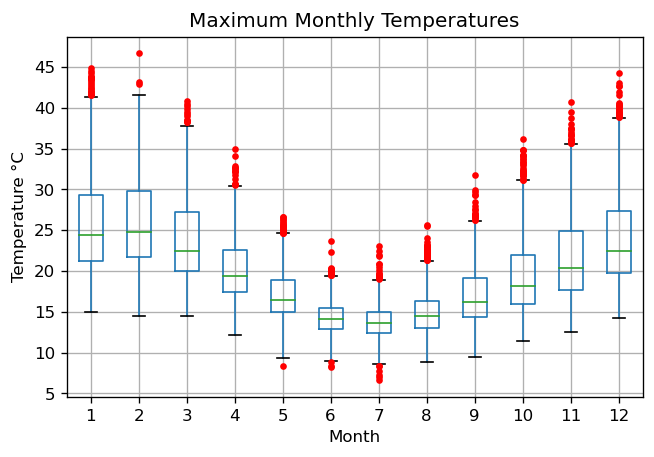

In [86]:
ax = df0[['month', 'maximum']].boxplot(column='maximum', by='month', sym='r.')
ax.set_title('Maximum Monthly Temperatures')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Temperature °C')
fig = plt.gcf()
fig.set_dpi(120)
plt.show()

Group by year and month (`period`):

In [87]:
# group by year & month and calculate that months average maximum temperature
df1 = df0.groupby(['year', 'month'])['maximum'].mean().reset_index()

How often do we get average monthly temperatures above 29°C and for what months?

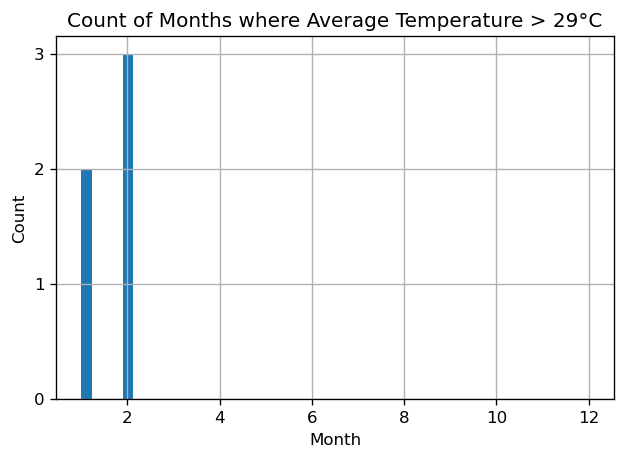

In [88]:
# report occurrences when the maximum temperature is above 29°C
max_months = df1.sort_values('month').query('maximum > 29.0')  # subselect month average > 29
bins = np.linspace(1, 12, endpoint=True)  # x-axis bins month as integer
max_months.hist(column='month', bins=bins)
ax = plt.gca()  # get current axes
ax.locator_params(axis='y', integer=True)  # y-axis count as integer
plt.title('Count of Months where Average Temperature > 29°C')
plt.xlabel('Month')
plt.ylabel('Count')
fig = plt.gcf()
fig.set_dpi(120)
plt.show()

So, January and February are typically our hottest months. We won't use data further. Instead we will use the maximum annual temperature for plotting the temperature trend.

Get annual maximum tempertures.

In [89]:
# get the hottest month for each year
df2 = df1.groupby('year')['maximum'].max().reset_index()
df2.tail()

,year,maximum
46,2017,26.996774
47,2018,27.887097
48,2019,29.045161
49,2020,26.932258
50,2021,25.383871


In [90]:
df2['maximum'].describe()

count    51.000000
mean     26.875776
std       1.403076
min      24.074194
25%      25.960089
50%      26.932258
75%      27.893548
max      29.487097
Name: maximum, dtype: float64

Determine the regression line using [linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares) (year ~ maximum temperature):

In [91]:
# prepare linear least squares polynomial fit (returns polynomial coefficients)
pred = np.polyfit(x=df2['year'], y=df2['maximum'], deg=1)
pred

array([0.01346006, 0.00949918])

In [92]:
# convert to pandas 1-dimensional polynomial so we can fit to dataframe
temp_pred = np.poly1d(pred)
temp_pred

poly1d([0.01346006, 0.00949918])

Append regression to data frame for plotting.

In [93]:
# add new column containing linear regression polynomial
df3 = df2.copy()
df3['prediction'] = temp_pred(df3['year'])
df3.tail()

,year,maximum,prediction
46,2017,26.996774,27.158437
47,2018,27.887097,27.171897
48,2019,29.045161,27.185357
49,2020,26.932258,27.198817
50,2021,25.383871,27.212277


Plot with linear regression line. This shows that mean annual maximim temperatures are steadly increasing.

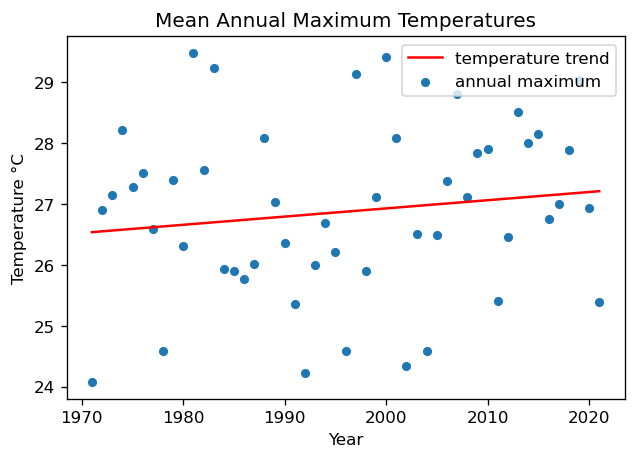

In [94]:
ax = plt.gca()    # get current axes
df3.plot(kind='scatter', x='year', y='maximum', label='annual maximum', ax=ax)
df3.plot('year', 'prediction', color='red', label='temperature trend', ax=ax)
plt.title('Mean Annual Maximum Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.legend()
fig = plt.gcf()   # get current figure
fig.set_dpi(120)  # enlargen image
plt.show()

## Summary

The mean annual temperature in Cheltenham, VIC has increased by 0.5°C.

## TODO

How have the maximum temperatures increased over this period?

That is: How has the daily maximum temperatures changed over the years?

How does this differ from the mean?